<a href="https://colab.research.google.com/github/todd-jang/RNN_MoNa-P/blob/main/cardection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#import necessary librabry
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
!unzip "C:\Users\82102_1ndslwu\Downloads\archive (8).zip"

unzip:  cannot find or open C:\Users\82102_1ndslwu\Downloads\archive (8).zip, C:\Users\82102_1ndslwu\Downloads\archive (8).zip.zip or C:\Users\82102_1ndslwu\Downloads\archive (8).zip.ZIP.


In [46]:
#defining the base, train and validation directory path
base_dir = '/content/drive/MyDrive/data1a'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [47]:
#defining the damage and whole , train nand validation directory
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

In [48]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [50]:
#defining model
from keras import Model 
from keras.applications import DenseNet121   

base_model = DenseNet121(input_shape = (150, 150, 3),  include_top = False, weights = 'imagenet') 

x=   tf.keras.layers.Flatten()(base_model.output)
x=   tf.keras.layers.Dense(512, activation='relu')(x) 
x=   tf.keras.layers.Dense(1, activation='sigmoid')(x) 

model= Model( base_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['Accuracy','Precision','Recall'])

#training the model
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      verbose=2)

Epoch 1/15
92/92 - 415s - loss: 0.5228 - Accuracy: 0.8435 - precision: 0.8473 - recall: 0.8380 - val_loss: 0.7579 - val_Accuracy: 0.7978 - val_precision: 0.7134 - val_recall: 0.9957 - 415s/epoch - 5s/step
Epoch 2/15
92/92 - 18s - loss: 0.1332 - Accuracy: 0.9565 - precision: 0.9575 - recall: 0.9554 - val_loss: 0.5182 - val_Accuracy: 0.8957 - val_precision: 0.8370 - val_recall: 0.9826 - 18s/epoch - 199ms/step
Epoch 3/15
92/92 - 23s - loss: 0.0735 - Accuracy: 0.9761 - precision: 0.9782 - recall: 0.9739 - val_loss: 0.3124 - val_Accuracy: 0.9370 - val_precision: 0.9507 - val_recall: 0.9217 - 23s/epoch - 249ms/step
Epoch 4/15
92/92 - 20s - loss: 0.0583 - Accuracy: 0.9842 - precision: 0.9837 - recall: 0.9848 - val_loss: 0.3316 - val_Accuracy: 0.9326 - val_precision: 0.9061 - val_recall: 0.9652 - 20s/epoch - 220ms/step
Epoch 5/15
92/92 - 18s - loss: 0.0504 - Accuracy: 0.9880 - precision: 0.9880 - recall: 0.9880 - val_loss: 0.3765 - val_Accuracy: 0.9565 - val_precision: 0.9730 - val_recall: 0.9

In [52]:
#weights saving
model.save("classifier.h5")

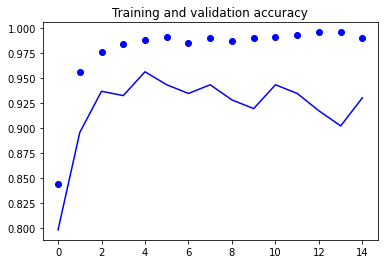

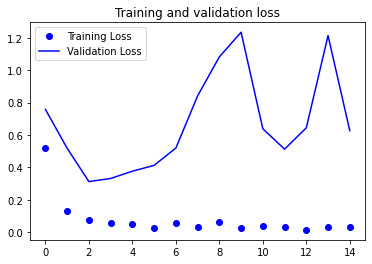

In [53]:
import matplotlib.pyplot as plt
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

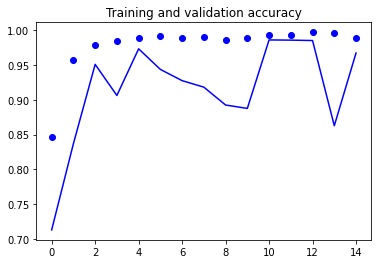

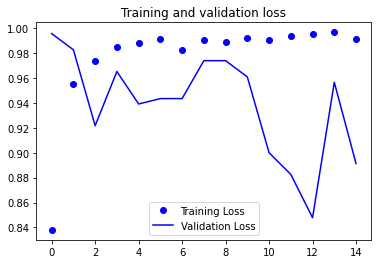

In [54]:
import matplotlib.pyplot as plt
acc = history.history['precision']
val_acc = history.history['val_precision']
loss = history.history['recall']
val_loss = history.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The car is damaged


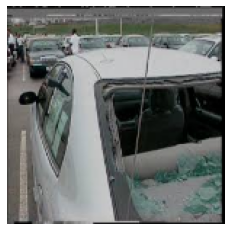

In [56]:
import cv2
im = cv2.imread("/content/drive/MyDrive/data1a/validation/00-damage/0021.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
if pred[0][0] == 0:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

[[0.]]
The car is not damaged


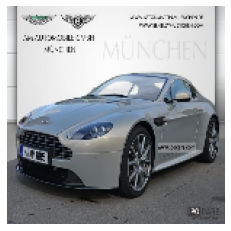

In [57]:
im = cv2.imread("/content/drive/MyDrive/data1a/validation/01-whole/0013.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
print(pred)
if pred[0][0] > 0:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

In [ ]:
!pip install flask-ngrok
from flask import Flask, url_for, redirect, render_template, request
from flask_ngrok import run_with_ngrok
import os

app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run

@app.route('/')
def index():
    return render_template('index.html')  # Start ngrok when app is run

if __name__ == '__main__':
    app.run()